# DBSCAN Clustering

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(data=iris['data'], columns=feature_names)
iris_df['target'] = iris['target']

print(iris_df.info())
display(iris_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan_model.fit_predict(iris['data'])

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result) # -1은 noise로 어떤 군집에도 속하지 않는 것으로 판단

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [8]:
def visualize_cluster_plot(clusterobj, df, label_name, isCenter=True):
    if isCenter:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(df[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False
    
    for label in unique_labels:
        label_cluster = df[df[label_name] == label]
        
        # DBSCAN을 위한 처리 로직
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster' + str(label)
            
        plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if isCenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker="$%d$" % label)
            
    if isNoise:
        legend_loc = 'upper center'
    else:
        legend_loc = 'upper right'
        
    plt.legend(loc=legend_loc)

## PCA 차원축소
- 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris['data'])

iris_df['feature1'] = pca_transformed[:, 0]
iris_df['feature2'] = pca_transformed[:, 1]

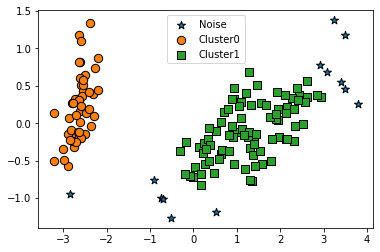

In [12]:
visualize_cluster_plot(dbscan_model, iris_df, 'dbscan_cluster', isCenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


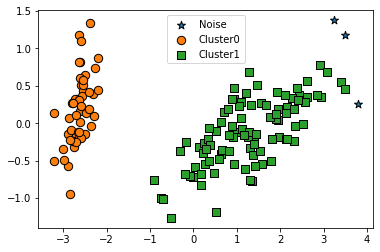

In [13]:
# eps의 크기를 증가한 후 Noise 확인
dbscan_model = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan_model.fit_predict(iris['data'])

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan_model, iris_df, 'dbscan_cluster', isCenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


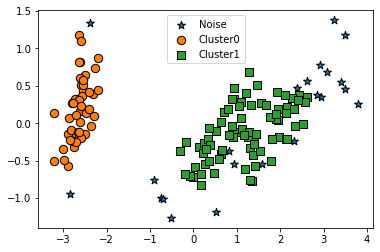

In [14]:
# min_samples의 크기를 증가한 후 Noise 확인
dbscan_model = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan_model.fit_predict(iris['data'])

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan_model, iris_df, 'dbscan_cluster', isCenter=False)

## 기하학적으로 복잡한 데이터의 DBSCAN 적용

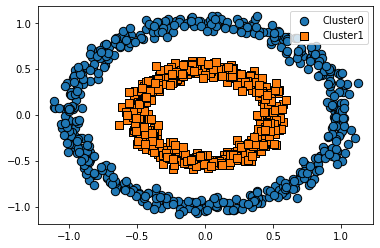

In [17]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster_df = pd.DataFrame(data=x, columns=['feature1', 'feature2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', isCenter=False)

## DBSCAN 군집화와 다른 군집화 알고리즘과 비교

### K-Means

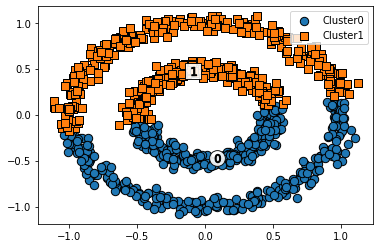

In [19]:
from sklearn.cluster import KMeans

# KMeans로 make_circles() 데이터세트에 대하여 군집화
kmeans_model = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans_model.fit_predict(x)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans_model, cluster_df, 'kmeans_label', isCenter=True)

### GMM

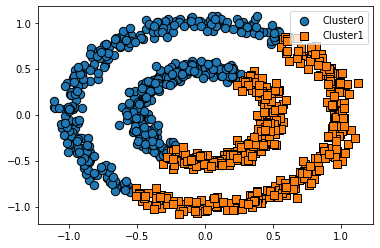

In [20]:
from sklearn.mixture import GaussianMixture

# GMM으로 make_circles() 데이터세트에 대하여 군집화
gmm_model = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm_model.fit_predict(x)
cluster_df['gmm_label'] = gmm_label

# GMM은 cluster_centers_ 속성이 없으므로 isCenter를 False로 설정
visualize_cluster_plot(gmm_model, cluster_df, 'gmm_label', isCenter=False)

### DBSCAN

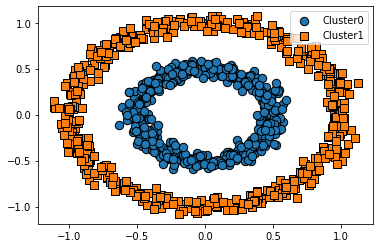

In [25]:
dbscan_model = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan_model.fit_predict(x)
cluster_df['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan_model, cluster_df, 'dbscan_cluster', isCenter=False)